In [11]:
import numpy as np
import pandas as pd
from msresist.validations import preprocess_ebdt_mcf7
from msresist.clustering import MassSpecClustering

In [12]:
x = preprocess_ebdt_mcf7()
d = x.select_dtypes(include=['float64']).T
i = x.select_dtypes(include=['object'])

Fit model

In [14]:
pam_model = MassSpecClustering(i, ncl=12, SeqWeight=5, distance_method="PAM250").fit(d, "NA")
pamC = pam_model.transform()

In [31]:
import pickle

with open('msresist/data/pickled_models/ebdt_mcf7_pam250_CL12_W5', 'wb') as f:
    pickle.dump([pam_model], f)

In [32]:
with open('msresist/data/pickled_models/ebdt_mcf7_pam250_CL12_W5', 'rb') as f:
    pam_model = pickle.load(f)[0]

Find centers

In [15]:
centers = pd.DataFrame(pamC)
centers.columns = np.arange(pam_model.ncl) + 1
centers.insert(0, "Sample", x.columns[3:])
centers["Sample"] = [s.split(".")[1].split(".")[0]  for s in centers["Sample"]]

PCA

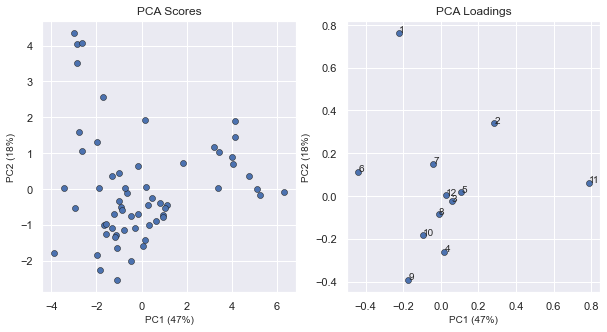

In [16]:
from msresist.figures.figure3 import plotPCA
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 2, figsize=(10, 5))

plotPCA(ax, centers, 2, ["Sample"], "Cluster")

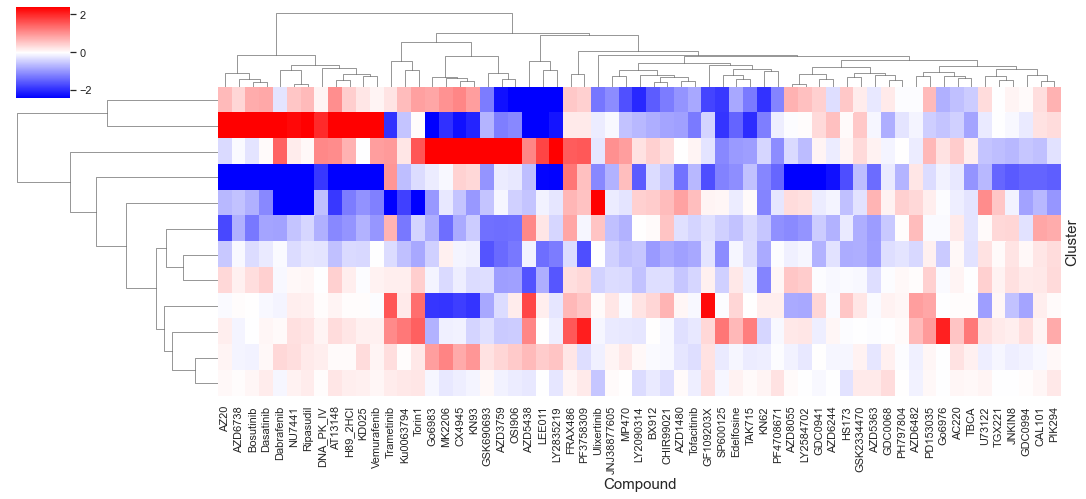

In [51]:
import seaborn as sns

def plotClustergram(data, title="", lim=False, robust=True, xticklabels=False, yticklabels=False, ylabel="", xlabel="", figsize=(10, 10)):
    """ Clustergram plot. """
    g = sns.clustermap(data, method="complete", cmap="bwr", robust=robust, vmax=lim, vmin=-lim, figsize=figsize, xticklabels=xticklabels, yticklabels=yticklabels)
    g.fig.suptitle(title, fontsize=17)
    ax = g.ax_heatmap
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    return g

d = centers.set_index("Sample")
g = plotClustergram(d.T, lim=max(abs(d)) * 0.2, xticklabels=True, ylabel="Cluster", xlabel="Compound", figsize=(15, 7))


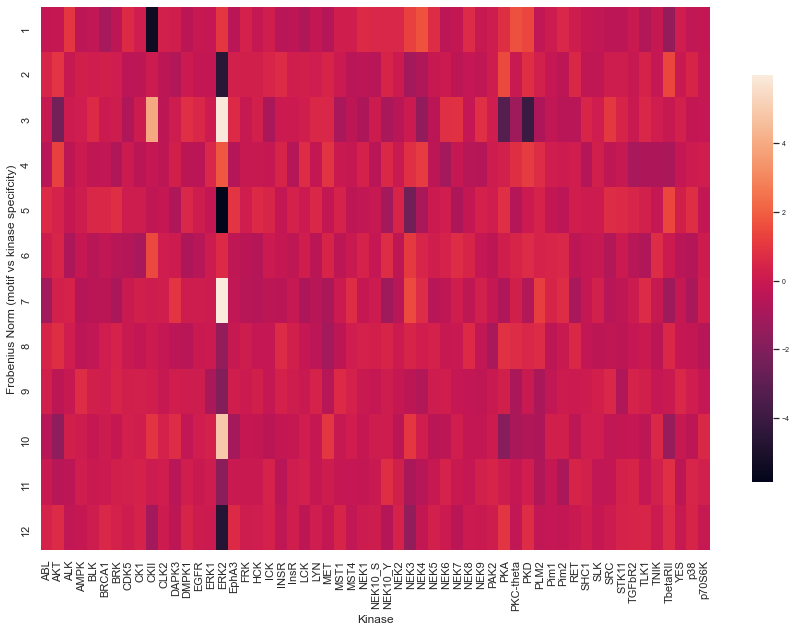

In [21]:
from msresist.figures.figure3 import plotUpstreamKinase_heatmap, plotMotifs

_, ax = plt.subplots(1, 1, figsize=(15, 10))
plotUpstreamKinase_heatmap(pam_model, list(np.arange(pam_model.ncl) + 1), ax)

In [26]:

_, ax = plt.subplots(4, 3, figsize=(15, 13))
pssms = pam_model.pssms(PsP_background=False)
motifs = [pssms[0], pssms[1], pssms[2], pssms[3], pssms[4], pssms[5], pssms[6], pssms[7], pssms[8], pssms[9], pssms[10], pssms[11]]
plotMotifs(motifs, titles=["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7", "Cluster 8", "Cluster 9", "Cluster 10", "Cluster 11", 'Cluster 12'], axes=ax)

NameError: name 'plotMotifs' is not defined